# COCO dataset - Keypoints

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

* Annotation  
2017 Train/Val annotations [241MB] http://images.cocodataset.org/annotations/annotations_trainval2017.zip
* Images
2017 Val images [5K/1GB] http://images.cocodataset.org/zips/val2017.zip

In [2]:
dataDir='annotations_trainval2017'
loc = '{}/annotations/'.format(dataDir)

In [3]:
loc

'annotations_trainval2017/annotations/'

In [4]:
!ls $loc

captions_train2017.json		 person_keypoints_val2017.json
captions_val2017.json		 person_keypoints_val2017_.json
instances_train2017.json	 person_keypoints_val2017_.json.bak
instances_val2017.json		 person_keypoints_val2017_small.json
person_keypoints_train2017.json  person_keypoints_val2017_small2.json


## Annotation - instances

In [5]:
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [6]:
annFile

'annotations_trainval2017/annotations/instances_val2017.json'

In [7]:
#!head $annFile

In [8]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.38s)
creating index...
index created!


In [9]:
coco

### Get img ids that satisfy given filter conditions.

In [10]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['person','skateboard'])
catIds = coco.getCatIds(catNms=['person','snowboard'])

In [11]:
catIds

[1, 36]

In [12]:
imgIds = coco.getImgIds(catIds=catIds )
print(imgIds)

[343937, 562818, 42628, 378244, 426376, 411530, 117645, 97679, 217872, 80273, 184978, 490515, 193429, 563349, 309655, 44195, 561958, 428454, 109992, 492968, 400044, 425906, 95155, 463542, 37689, 36539, 361919, 23359, 350405, 402118, 142790, 125257, 387916, 364884, 341719, 94944, 407650, 451043, 447465, 74860, 456303, 326128, 89078, 516601, 491130, 470779, 393469, 97278]


In [13]:
len(imgIds)

48

In [14]:
idx = 0
imgIds = coco.getImgIds(imgIds = [imgIds[idx]])
print(imgIds)

[343937]


In [15]:
#imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
img = coco.loadImgs(imgIds)[0]

In [16]:
img

{'license': 4,
 'file_name': '000000343937.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000343937.jpg',
 'height': 428,
 'width': 640,
 'date_captured': '2013-11-20 12:55:34',
 'flickr_url': 'http://farm5.staticflickr.com/4072/4320314557_bfcc972543_z.jpg',
 'id': 343937}

In [17]:
img['file_name']

'000000343937.jpg'

In [18]:
# use url to load image
I = io.imread(img['coco_url'])

## Annotations - Keypoints

In [19]:
dataDir, dataType

('annotations_trainval2017', 'val2017')

In [20]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
print(annFile)

annotations_trainval2017/annotations/person_keypoints_val2017.json


In [21]:
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.23s)
creating index...
index created!


In [22]:
annIds = coco_kps.getAnnIds(imgIds=img['id'], iscrowd=None)
print(annIds)

[425370]


In [23]:
anns = coco_kps.loadAnns(annIds)

In [24]:
#anns

In [25]:
anns[0]['image_id']

343937

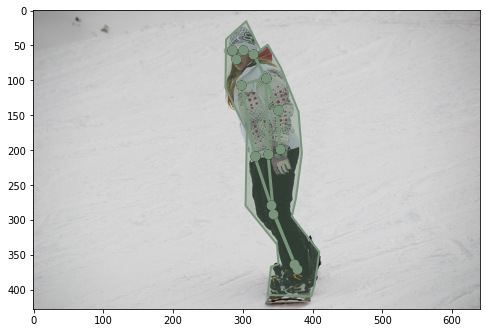

In [26]:
plt.figure()
plt.imshow(I)
coco_kps.showAnns(anns)

In [27]:
kpts = anns[0]['keypoints']

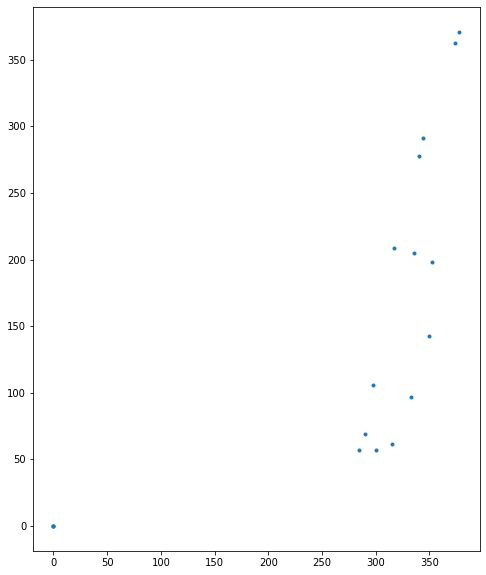

In [28]:
kpts_x = kpts[::3]
kpts_y = kpts[1::3]

plt.figure()
plt.plot(kpts_x, kpts_y, '.')

* References
    * https://cocodataset.org/#download
    * https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb